In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import KFold

# DATASET #1: Setup the German Credit Data

In [2]:
#Load the data
data = pd.read_csv("../data/german_credit_data/german.data", sep=" ", header = None)
data.columns = ['account_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_account_or_bonds',
                'present_employment_since', 'installment_rate', 'personal_status_and_sex', 'other_debtors_or_guarantors',
                'present_residence_since', 'property', 'age', 'other_installment_plans', 'housing', 
                'number_of_exisiting_credits', 'job', 'number_of_people_liable_for_maintenance', 'telephone', 'foreign_worker',
                'class']

In [3]:
#le = preprocessing.LabelEncoder()
#le.fit(["paris", "paris", "tokyo", "amsterdam"])
#le.transform(["tokyo", "tokyo", "paris"]) 
#data['account_status']

In [4]:
#Transform any categorical values
#le = preprocessing.LabelEncoder()
#data = data.apply(le.fit_transform)
data

account_status  duration credit_history purpose  credit_amount  \
0              A11         6            A34     A43           1169   
1              A12        48            A32     A43           5951   
2              A14        12            A34     A46           2096   
3              A11        42            A32     A42           7882   
4              A11        24            A33     A40           4870   
..             ...       ...            ...     ...            ...   
995            A14        12            A32     A42           1736   
996            A11        30            A32     A41           3857   
997            A14        12            A32     A43            804   
998            A11        45            A32     A43           1845   
999            A12        45            A34     A41           4576   

    savings_account_or_bonds present_employment_since  installment_rate  \
0                        A65                      A75                 4   
1                        A61                      A73                 2   
2                        A61                      A74                 2   
3                        A61                      A74                 2   
4                        A61                      A73                 3   
..                       ...                      ...               ...   
995                      A61                      A74                 3   
996                      A61                      A73                 4   
997                      A61                      A75                 4   
998                      A61                      A73                 4   
999                      A62                      A71                 3   

    personal_status_and_sex other_debtors_or_guarantors  ...  property age  \
0                       A93                        A101  ...      A121  67   
1                       A92                        A101  ...      A121  22   
2                       A93                        A101  ...      A121  49   
3                       A93                        A103  ...      A122  45   
4                       A93                        A101  ...      A124  53   
..                      ...                         ...  ...       ...  ..   
995                     A92                        A101  ...      A121  31   
996                     A91                        A101  ...      A122  40   
997                     A93                        A101  ...      A123  38   
998                     A93                        A101  ...      A124  23   
999                     A93                        A101  ...      A123  27   

     other_installment_plans housing number_of_exisiting_credits   job  \
0                       A143    A152                           2  A173   
1                       A143    A152                           1  A173   
2                       A143    A152                           1  A172   
3                       A143    A153                           1  A173   
4                       A143    A153                           2  A173   
..                       ...     ...                         ...   ...   
995                     A143    A152                           1  A172   
996                     A143    A152                           1  A174   
997                     A143    A152                           1  A173   
998                     A143    A153                           1  A173   
999                     A143    A152                           1  A173   

    number_of_people_liable_for_maintenance  telephone foreign_worker class  
0                                         1       A192           A201     1  
1                                         1       A191           A201     2  
2                                         2       A191           A201     1  
3                                         2       A191           A201     1  
4                                         2   

In [5]:
#Get a subset of the data
sub_data = data[['credit_amount', 'duration', 'age', 'class']]
sub_data

credit_amount  duration  age  class
0             1169         6   67      1
1             5951        48   22      2
2             2096        12   49      1
3             7882        42   45      1
4             4870        24   53      2
..             ...       ...  ...    ...
995           1736        12   31      1
996           3857        30   40      1
997            804        12   38      1
998           1845        45   23      2
999           4576        45   27      1

[1000 rows x 4 columns]

## Part 1 (Impurity Measure = Gini):

### Build a decision tree model

In [6]:
#Apply Decision Tree Classifier
def decision_tree_classifier(sub_data, impurity_measure, tree_depth, show_plot=True):
    Y = sub_data['class']
    X = sub_data.drop(['class'], axis=1)

    clf = tree.DecisionTreeClassifier(criterion=impurity_measure, max_depth=tree_depth)
    clf = clf.fit(X, Y)
    
    if show_plot:
        fn=['credit_amount', 'duration', 'age']
        cn=['1', '2']
        fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10), dpi=1500)
        tree.plot_tree(clf,
                       feature_names = fn, 
                       class_names=cn,
                       filled = True);
    return clf

In [7]:
clf = decision_tree_classifier(sub_data, 'gini', 4, True)

### Compute Holdout

In [8]:
#Perform holdout
def holdout(sub_data, impurity_measure, tree_depth, is_test):
    #Split data in train and test
    train_data = sub_data.sample(frac = 0.9)
    test_data = sub_data.drop(train_data.index)
    
    #Apply Decision Tree Classifier to train_data
    clf = decision_tree_classifier(train_data, impurity_measure, tree_depth, False)
    
    if (is_test):
        #Apply Decision Tree Classifier to test_data
        testY = test_data['class']
        testX = test_data.drop(['class'],axis=1)

        predY = clf.predict(testX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(testY, predY)
        precision = precision_score(testY, predY)
        f_measure =  f1_score(testY, predY)
        
    else:
        #Apply Decision Tree Classifier to train_data
        trainY = train_data['class']
        trainX = train_data.drop(['class'],axis=1)

        predY = clf.predict(trainX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(trainY, predY)
        precision = precision_score(trainY, predY)
        f_measure =  f1_score(trainY, predY)

    return [round(accuracy, 2), round(precision, 2), round(f_measure, 2)]

In [9]:
#Perform holdout 5 times
def holdout_x5(sub_data, impurity_measure, tree_depth, is_test):
    accuracy_list = ['accuracy']
    precision_list = ['precision']
    f_measure_list = ['f_measure']

    for x in range(5):
        metrics = holdout(sub_data, impurity_measure, tree_depth, is_test)
        #print(metrics)
        accuracy_list.append(metrics[0])
        precision_list.append(metrics[1])
        f_measure_list.append(metrics[2])

    avg_accuracy = round(np.mean(accuracy_list[1:]), 2)
    avg_precision = round(np.mean(precision_list[1:]), 2)
    avg_f_measure = round(np.mean(f_measure_list[1:]), 2)

    accuracy_list.append(avg_accuracy)
    precision_list.append(avg_precision)
    f_measure_list.append(avg_f_measure)

    #print(accuracy_list)
    #print(precision_list)
    #print(f_measure_list)

    metrics_data = pd.DataFrame([accuracy_list, precision_list, f_measure_list],
                               columns=['metric', 'trial #1', 'trial #2', 'trial #3', 'trial #4', 'trial #5', 'average'])
    return metrics_data

gini_holdout = holdout_x5(sub_data, 'gini', 4, True)
gini_holdout

metric  trial #1  trial #2  trial #3  trial #4  trial #5  average
0   accuracy      0.64      0.67      0.70      0.74      0.65     0.68
1  precision      0.66      0.72      0.70      0.73      0.69     0.70
2  f_measure      0.77      0.80      0.81      0.84      0.77     0.80

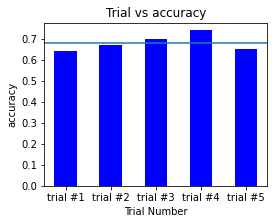

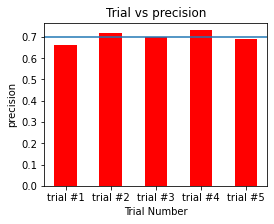

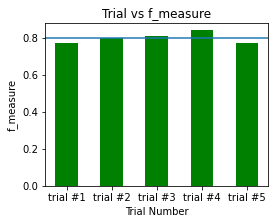

In [10]:
#Plot the metrics
columns = gini_holdout.columns.values[1:-1]
accuracy_values = gini_holdout.loc[0].values[1:-1]
precision_values = gini_holdout.loc[1].values[1:-1]
f_measure_values = gini_holdout.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(gini_holdout['average'][0]) #show average line
plt.show() 

#Create precision bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(gini_holdout['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(gini_holdout['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is above average (68%), the precision is fairly high (70%), and the f_measure is high (80%).

### Compute Cross-validation

In [11]:
#Perform cross-validation
def cross_validation(sub_data, impurity_measure):
    accuracy_list = ['accuracy']
    precision_list = ['precision']
    f_measure_list = ['f_measure']
    
    kf = KFold(n_splits=10)
    #Split data in train and test
    for train, test in kf.split(sub_data):
        train_data = sub_data.loc[train]
        test_data = sub_data.loc[test]
        
        #Apply Decision Tree Classifier to train_data
        clf = decision_tree_classifier(train_data, impurity_measure, 4, False)

        #Apply Decision Tree Classifier to test_data
        testY = test_data['class']
        testX = test_data.drop(['class'],axis=1)

        predY = clf.predict(testX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(testY, predY)
        precision = precision_score(testY, predY)
        f_measure =  f1_score(testY, predY)        

        metrics = [round(accuracy, 2), round(precision, 2), round(f_measure, 2)]
        
        accuracy_list.append(metrics[0])
        precision_list.append(metrics[1])
        f_measure_list.append(metrics[2])

    avg_accuracy = round(np.mean(accuracy_list[1:]), 2)
    avg_precision = round(np.mean(precision_list[1:]), 2)
    avg_f_measure = round(np.mean(f_measure_list[1:]), 2)

    accuracy_list.append(avg_accuracy)
    precision_list.append(avg_precision)
    f_measure_list.append(avg_f_measure)
    
    metrics_data = pd.DataFrame([accuracy_list, precision_list, f_measure_list],
                           columns=['metric', 'trial #1', 'trial #2', 'trial #3', 'trial #4', 'trial #5', 'trial #6', 'trial #7', 'trial #8', 'trial #9', 'trial #10', 'average'])
        
    return metrics_data
    
gini_cross_validation = cross_validation(sub_data, 'gini')
gini_cross_validation

metric  trial #1  trial #2  trial #3  trial #4  trial #5  trial #6  \
0   accuracy      0.75      0.65      0.76      0.74      0.74      0.61   
1  precision      0.78      0.68      0.80      0.77      0.73      0.60   
2  f_measure      0.85      0.78      0.86      0.84      0.85      0.75   

   trial #7  trial #8  trial #9  trial #10  average  
0      0.68      0.70      0.66       0.68     0.70  
1      0.70      0.71      0.71       0.69     0.72  
2      0.80      0.81      0.79       0.80     0.81

0.68


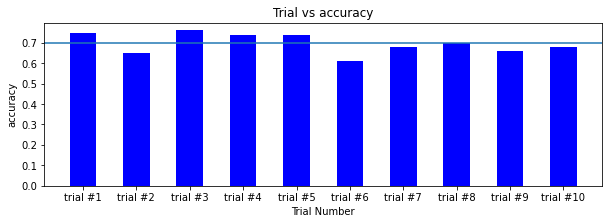

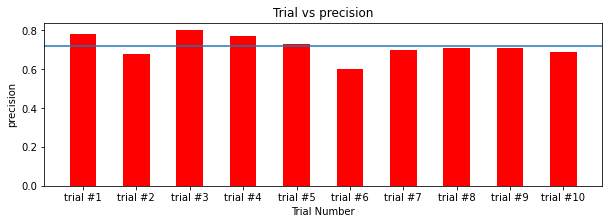

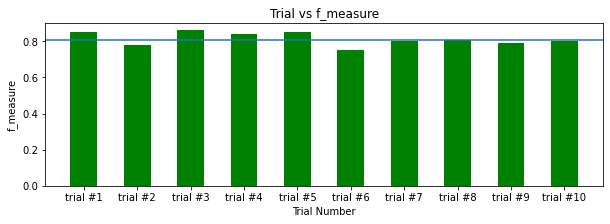

In [12]:
#Plot the metrics
columns = gini_cross_validation.columns.values[1:-1]
accuracy_values = gini_cross_validation.loc[0].values[1:-1]
precision_values = gini_cross_validation.loc[1].values[1:-1]
f_measure_values = gini_cross_validation.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(gini_cross_validation['average'][0]) #show average line
print(gini_holdout['average'][0])
plt.show() 

#Create precision bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(gini_cross_validation['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(gini_cross_validation['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is fairly high (70%), the precision is fairly high (72%), and the f_measure is high (81%).

## Part 2 (Impurity Measure = Entropy)

In [13]:
#Perform holdout 5 times
entropy_holdout = holdout_x5(sub_data, 'entropy', 4, True)
entropy_holdout

metric  trial #1  trial #2  trial #3  trial #4  trial #5  average
0   accuracy      0.69      0.75      0.66      0.57      0.74     0.68
1  precision      0.69      0.76      0.69      0.57      0.73     0.69
2  f_measure      0.81      0.85      0.78      0.71      0.84     0.80

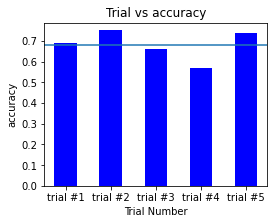

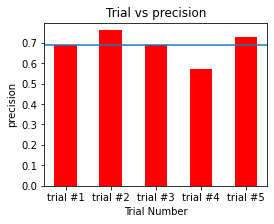

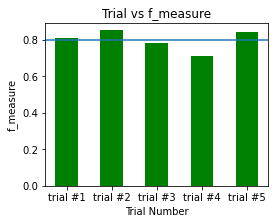

In [14]:
#Plot the metrics
columns = entropy_holdout.columns.values[1:-1]
accuracy_values = entropy_holdout.loc[0].values[1:-1]
precision_values = entropy_holdout.loc[1].values[1:-1]
f_measure_values = entropy_holdout.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(entropy_holdout['average'][0]) #show average line
plt.show() 

#Create precision bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(entropy_holdout['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(entropy_holdout['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is above average (68%), the precision is above average (69%), and the f_measure is high (80%).

In [15]:
#Perform cross-validation
entropy_cross_validation = cross_validation(sub_data, 'entropy')
entropy_cross_validation

metric  trial #1  trial #2  trial #3  trial #4  trial #5  trial #6  \
0   accuracy      0.75      0.66      0.75      0.74      0.70      0.61   
1  precision      0.78      0.68      0.80      0.77      0.72      0.60   
2  f_measure      0.85      0.79      0.85      0.84      0.82      0.75   

   trial #7  trial #8  trial #9  trial #10  average  
0      0.65      0.71      0.74       0.68     0.70  
1      0.69      0.71      0.73       0.69     0.72  
2      0.78      0.82      0.85       0.80     0.82

0.68


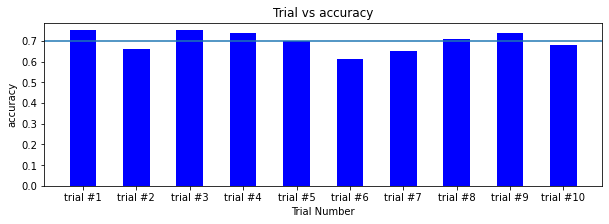

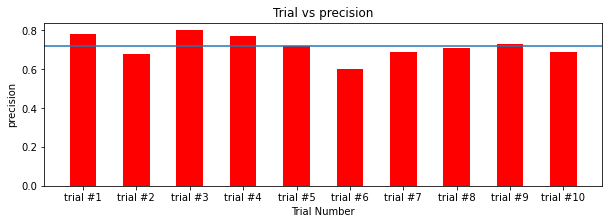

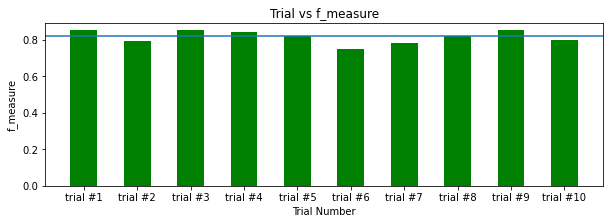

In [16]:
#Plot the metrics
columns = entropy_cross_validation.columns.values[1:-1]
accuracy_values = entropy_cross_validation.loc[0].values[1:-1]
precision_values = entropy_cross_validation.loc[1].values[1:-1]
f_measure_values = entropy_cross_validation.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(entropy_cross_validation['average'][0]) #show average line
print(gini_holdout['average'][0])
plt.show() 

#Create precision bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(entropy_cross_validation['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(entropy_cross_validation['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is fairly high (70%), the precision is fairly high (72%), and the f_measure is high (82%).

In [17]:
#Select accuracies
gini_cross_validation_accuracy = gini_cross_validation['average'][0]
entropy_cross_validation_accuracy  = entropy_cross_validation['average'][0]
#print(gini_cross_validation_accuracy)
#print(entropy_cross_validation_accuracy)

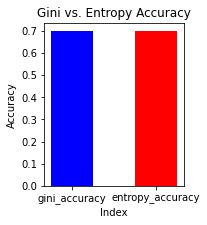

In [18]:
accuracy_labels = ["gini_accuracy", "entropy_accuracy"]
accuracy_values = [gini_cross_validation_accuracy, entropy_cross_validation_accuracy]

#Create the bar plot
plt.figure(figsize=(2.5,3))
plt.bar(accuracy_labels, accuracy_values, color =['blue', 'red'], width = 0.5)
plt.title("Gini vs. Entropy Accuracy") 
plt.xlabel("Index") 
plt.ylabel("Accuracy") 
plt.show() 

### Observations:
The plot above shows that the final accuracy using gini and entropy are both equal at 0.7 or 70%.

## Part 3 - Tree Depth Investigation

In [29]:
tree_depths = np.arange(2, 51, 3)
train_y = []
test_y = []
for tree_depth in range (2, 51, 3):
    gini_holdout_accuracy_train = holdout_x5(sub_data, 'gini', tree_depth, False)['average'][0]
    gini_holdout_accuracy_test = holdout_x5(sub_data, 'gini', tree_depth, True)['average'][0]
    train_y.append(gini_holdout_accuracy_train)
    test_y.append(gini_holdout_accuracy_test)
print(train_y)
print(test_y)

[0.73, 0.76, 0.82, 0.89, 0.95, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7, 0.72, 0.66, 0.65, 0.64, 0.67, 0.62, 0.64, 0.63, 0.63, 0.65, 0.62, 0.65, 0.65, 0.63, 0.65, 0.62]


Text(0, 0.5, 'Accuracy')

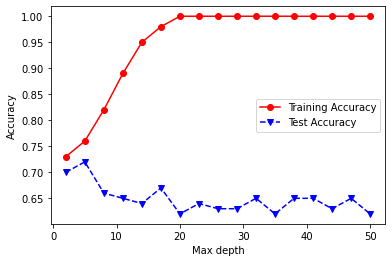

In [30]:
#Plot the tree-depth accuracies
plt.plot(tree_depths, train_y, 'ro-', tree_depths, test_y, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Observations:
The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). The training accuracy reaches at 100% at around a maximum depth of 20. However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model becoming too complex and overfitting.

# DATASET #2: Setup the Waveform Database Generator Data

In [147]:
#Load the data
data_2 = pd.read_csv("../data/waveform_database_generator/waveform.data", sep=",", header = None)
data_2.columns = ['Sub_Wave_1', 'Sub_Wave_2', 'Sub_Wave_3', 'Sub_Wave_4', 'Sub_Wave_5', 'Sub_Wave_6', 'Sub_Wave_7', 
                 'Sub_Wave_8', 'Sub_Wave_9', 'Sub_Wave_10', 'Sub_Wave_11', 'Sub_Wave_12', 'Sub_Wave_13', 'Sub_Wave_14', 
                 'Sub_Wave_15', 'Sub_Wave_16', 'Sub_Wave_17', 'Sub_Wave_18', 'Sub_Wave_19', 'Sub_Wave_20', 'Sub_Wave_21', 
                  'class']
data_2

Sub_Wave_1  Sub_Wave_2  Sub_Wave_3  Sub_Wave_4  Sub_Wave_5  Sub_Wave_6  \
0          -1.23       -1.56       -1.75       -0.28        0.60        2.22   
1          -0.69        2.43        0.61        2.08        2.30        3.25   
2          -0.12       -0.94        1.29        2.59        2.42        3.55   
3           0.86        0.29        2.19       -0.02        1.13        2.51   
4           1.16        0.37        0.40       -0.59        2.66        1.00   
...          ...         ...         ...         ...         ...         ...   
4995       -0.65        0.69        2.29       -0.16        0.51        0.26   
4996       -0.02        0.67        2.34        3.18        2.16        4.77   
4997        0.01       -1.99        0.16        2.30       -0.53        1.93   
4998       -0.40        0.41       -0.48        1.04        0.79       -0.66   
4999        0.63       -0.07        2.71        2.55        3.36        3.22   

      Sub_Wave_7  Sub_Wave_8  Sub_Wave_9  Sub_Wave_10  ...  Sub_Wave_13  \
0           0.85        0.21       -0.20         0.89  ...         2.89   
1           5.52        4.55        2.97         2.22  ...         1.24   
2           4.94        3.25        1.90         2.07  ...         2.50   
3           2.37        5.45        5.45         4.84  ...         2.58   
4           2.69        4.06        5.34         3.53  ...         4.30   
...          ...         ...         ...          ...  ...          ...   
4995        2.34       -0.42        0.49         0.31  ...         3.46   
4996        6.70        4.54        4.92         3.39  ...         1.53   
4997        3.61        3.00        4.61         5.73  ...         3.14   
4998        1.18        0.52        2.20         0.59  ...         3.64   
4999        3.69        4.67        3.45         3.87  ...        -0.52   

      Sub_Wave_14  Sub_Wave_15  Sub_Wave_16  Sub_Wave_17  Sub_Wave_18  \
0            7.75         4.59         3.15         5.12         3.32   
1            1.89         1.88        -1.34         0.83         1.41   
2            0.12         1.41         2.78         0.64         0.62   
3            1.40         1.24         1.41         1.07        -1.43   
4            1.84         1.73         0.21        -0.18         0.13   
...           ...          ...          ...          ...          ...   
4995         4.81         5.49         5.19         3.10         3.86   
4996         2.52         1.14        -1.56        -1.18        -0.56   
4997         3.04         1.61         0.60        -0.52         0.62   
4998         3.62         5.97         2.63         3.83         1.72   
4999         1.90         0.88         3.15         1.27        -0.53   

      Sub_Wave_19  Sub_Wave_20  Sub_Wave_21  class  
0            1.20         0.24        -0.56      2  
1            1.78         0.60         2.42      1  
2           -0.01        -0.79        -0.12      0  
3            2.84        -1.18         1.12      1  
4           -0.21        -0.80        -0.68      1  
...           ...          ...          ...    ...  
4995         2.96         1.09        -1.42      0  
4996         0.02        -1.05        -0.18      1  
4997         1.00         1.21        -0.27      1  
4998         2.08         1.31         1.37      0  
4999         0.09         0.01         0.60      1  

[5000 rows x 22 columns]

In [148]:
#Get a subset of the data
sub_data_2 = data_2[['Sub_Wave_1', 'Sub_Wave_2', 'Sub_Wave_3', 'Sub_Wave_11','Sub_Wave_19', 'Sub_Wave_20', 'Sub_Wave_21', 'class']]
sub_data_2

Sub_Wave_1  Sub_Wave_2  Sub_Wave_3  Sub_Wave_11  Sub_Wave_19  \
0          -1.23       -1.56       -1.75         1.08         1.20   
1          -0.69        2.43        0.61         2.81         1.78   
2          -0.12       -0.94        1.29         0.51        -0.01   
3           0.86        0.29        2.19         4.65         2.84   
4           1.16        0.37        0.40         4.82        -0.21   
...          ...         ...         ...          ...          ...   
4995       -0.65        0.69        2.29         0.34         2.96   
4996       -0.02        0.67        2.34         2.56         0.02   
4997        0.01       -1.99        0.16         4.53         1.00   
4998       -0.40        0.41       -0.48         0.85         2.08   
4999        0.63       -0.07        2.71         4.15         0.09   

      Sub_Wave_20  Sub_Wave_21  class  
0            0.24        -0.56      2  
1            0.60         2.42      1  
2           -0.79        -0.12      0  
3           -1.18         1.12      1  
4           -0.80        -0.68      1  
...           ...          ...    ...  
4995         1.09        -1.42      0  
4996        -1.05        -0.18      1  
4997         1.21        -0.27      1  
4998         1.31         1.37      0  
4999         0.01         0.60      1  

[5000 rows x 8 columns]

## Part 1 (Impurity Measure = Gini):

In [149]:
#Apply Decision Tree Classifier
def decision_tree_classifier(sub_data, impurity_measure, tree_depth, show_plot=True):
    Y = sub_data['class']
    X = sub_data.drop(['class'], axis=1)

    clf = tree.DecisionTreeClassifier(criterion=impurity_measure, max_depth=tree_depth)
    clf = clf.fit(X, Y)
    
    if show_plot:
        fn=['Sub_Wave_1', 'Sub_Wave_2', 'Sub_Wave_3', 'Sub_Wave_11', 'Sub_Wave_19', 'Sub_Wave_20', 'Sub_Wave_21']
        cn=['0', '1', '2']
        fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10), dpi=1500)
        tree.plot_tree(clf,
                       feature_names = fn, 
                       class_names=cn,
                       filled = True);
    return clf

In [150]:
clf = decision_tree_classifier(sub_data_2, 'gini', 4, True)

### Compute Holdout

In [159]:
#Perform holdout
def holdout_v2(sub_data, impurity_measure, tree_depth, is_test):
    #Split data in train and test
    train_data = sub_data.sample(frac = 0.9)
    test_data = sub_data.drop(train_data.index)
    
    #Apply Decision Tree Classifier to train_data
    clf = decision_tree_classifier(train_data, impurity_measure, tree_depth, False)
    
    if (is_test):
        #Apply Decision Tree Classifier to test_data
        testY = test_data['class']
        testX = test_data.drop(['class'],axis=1)

        predY = clf.predict(testX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(testY, predY)
        precision = precision_score(testY, predY, average='weighted')
        f_measure =  f1_score(testY, predY, average='weighted')
        
    else:
        #Apply Decision Tree Classifier to train_data
        trainY = train_data['class']
        trainX = train_data.drop(['class'],axis=1)

        predY = clf.predict(trainX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(trainY, predY)
        precision = precision_score(trainY, predY, average='weighted')
        f_measure =  f1_score(trainY, predY, average='weighted')

    return [round(accuracy, 2), round(precision, 2), round(f_measure, 2)]

In [160]:
#Perform holdout 5 times
def holdout_x5_v2(sub_data, impurity_measure, tree_depth, is_test):
    accuracy_list = ['accuracy']
    precision_list = ['precision']
    f_measure_list = ['f_measure']

    for x in range(5):
        metrics = holdout_v2(sub_data, impurity_measure, tree_depth, is_test)
        #print(metrics)
        accuracy_list.append(metrics[0])
        precision_list.append(metrics[1])
        f_measure_list.append(metrics[2])

    avg_accuracy = round(np.mean(accuracy_list[1:]), 2)
    avg_precision = round(np.mean(precision_list[1:]), 2)
    avg_f_measure = round(np.mean(f_measure_list[1:]), 2)

    accuracy_list.append(avg_accuracy)
    precision_list.append(avg_precision)
    f_measure_list.append(avg_f_measure)

    #print(accuracy_list)
    #print(precision_list)
    #print(f_measure_list)

    metrics_data = pd.DataFrame([accuracy_list, precision_list, f_measure_list],
                               columns=['metric', 'trial #1', 'trial #2', 'trial #3', 'trial #4', 'trial #5', 'average'])
    return metrics_data

gini_holdout = holdout_x5_v2(sub_data_2, 'gini', 4, True)
gini_holdout

metric  trial #1  trial #2  trial #3  trial #4  trial #5  average
0   accuracy      0.61      0.61      0.60      0.60      0.59      0.6
1  precision      0.60      0.62      0.61      0.60      0.59      0.6
2  f_measure      0.60      0.61      0.59      0.59      0.59      0.6

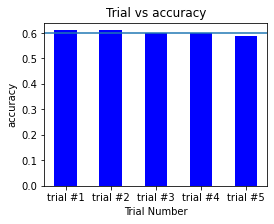

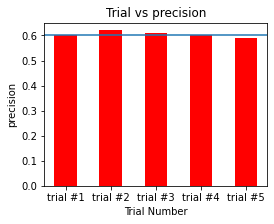

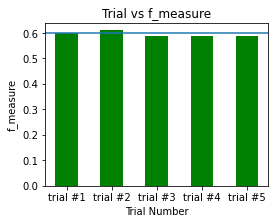

In [161]:
#Plot the metrics
columns = gini_holdout.columns.values[1:-1]
accuracy_values = gini_holdout.loc[0].values[1:-1]
precision_values = gini_holdout.loc[1].values[1:-1]
f_measure_values = gini_holdout.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(gini_holdout['average'][0]) #show average line
plt.show() 

#Create precision bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(gini_holdout['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(gini_holdout['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is just above average (60%), the precision is just above average (60%), and the f_measure is is just above average (60%).

In [168]:
#Perform cross-validation
def cross_validation_v2(sub_data, impurity_measure):
    accuracy_list = ['accuracy']
    precision_list = ['precision']
    f_measure_list = ['f_measure']
    
    kf = KFold(n_splits=10)
    #Split data in train and test
    for train, test in kf.split(sub_data):
        train_data = sub_data.loc[train]
        test_data = sub_data.loc[test]
        
        #Apply Decision Tree Classifier to train_data
        clf = decision_tree_classifier(train_data, impurity_measure, 4, False)

        #Apply Decision Tree Classifier to test_data
        testY = test_data['class']
        testX = test_data.drop(['class'],axis=1)

        predY = clf.predict(testX)
        predictions = pd.DataFrame(predY, columns = ['Predicted Class'])
        #print(predictions)

        #Compute Accuracy, Precision, F-measure
        accuracy = accuracy_score(testY, predY)
        precision = precision_score(testY, predY, average='weighted')
        f_measure =  f1_score(testY, predY, average='weighted')        

        metrics = [round(accuracy, 2), round(precision, 2), round(f_measure, 2)]
        
        accuracy_list.append(metrics[0])
        precision_list.append(metrics[1])
        f_measure_list.append(metrics[2])

    avg_accuracy = round(np.mean(accuracy_list[1:]), 2)
    avg_precision = round(np.mean(precision_list[1:]), 2)
    avg_f_measure = round(np.mean(f_measure_list[1:]), 2)

    accuracy_list.append(avg_accuracy)
    precision_list.append(avg_precision)
    f_measure_list.append(avg_f_measure)
    
    metrics_data = pd.DataFrame([accuracy_list, precision_list, f_measure_list],
                           columns=['metric', 'trial #1', 'trial #2', 'trial #3', 'trial #4', 'trial #5', 'trial #6', 'trial #7', 'trial #8', 'trial #9', 'trial #10', 'average'])
        
    return metrics_data
    
gini_cross_validation = cross_validation_v2(sub_data_2, 'gini')
gini_cross_validation

metric  trial #1  trial #2  trial #3  trial #4  trial #5  trial #6  \
0   accuracy      0.62      0.62      0.58      0.62      0.59      0.62   
1  precision      0.63      0.62      0.58      0.62      0.59      0.62   
2  f_measure      0.62      0.62      0.58      0.61      0.59      0.61   

   trial #7  trial #8  trial #9  trial #10  average  
0      0.64      0.61      0.59       0.62     0.61  
1      0.64      0.61      0.59       0.61     0.61  
2      0.64      0.61      0.59       0.61     0.61

0.6


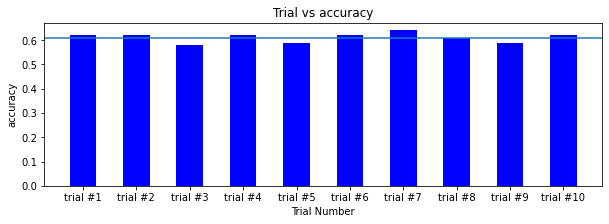

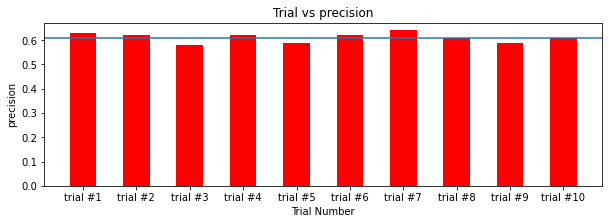

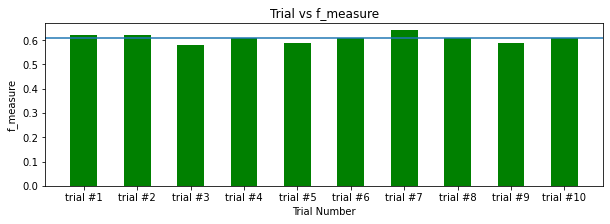

In [169]:
#Plot the metrics
columns = gini_cross_validation.columns.values[1:-1]
accuracy_values = gini_cross_validation.loc[0].values[1:-1]
precision_values = gini_cross_validation.loc[1].values[1:-1]
f_measure_values = gini_cross_validation.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(gini_cross_validation['average'][0]) #show average line
print(gini_holdout['average'][0])
plt.show() 

#Create precision bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(gini_cross_validation['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(gini_cross_validation['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is just above average (61%), the precision is just above average (61%), and the f_measure is just above average (61%).

## Part 2 (Impurity Measure = Entropy)

In [178]:
#Perform holdout 5 times
entropy_holdout = holdout_x5_v2(sub_data_2, 'entropy', 4, True)
entropy_holdout

metric  trial #1  trial #2  trial #3  trial #4  trial #5  average
0   accuracy      0.56      0.57      0.61      0.58      0.55     0.57
1  precision      0.57      0.57      0.61      0.58      0.55     0.58
2  f_measure      0.57      0.57      0.60      0.57      0.54     0.57

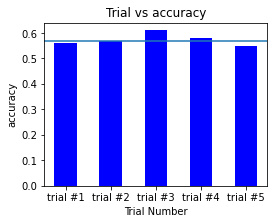

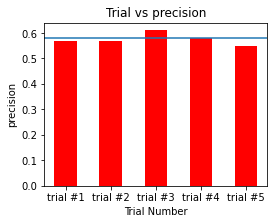

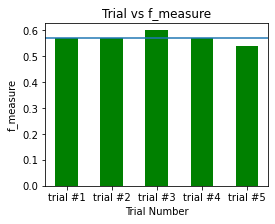

In [179]:
#Plot the metrics
columns = entropy_holdout.columns.values[1:-1]
accuracy_values = entropy_holdout.loc[0].values[1:-1]
precision_values = entropy_holdout.loc[1].values[1:-1]
f_measure_values = entropy_holdout.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(entropy_holdout['average'][0]) #show average line
plt.show() 

#Create precision bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(entropy_holdout['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(4,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(entropy_holdout['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is just above average (57%), the precision is just above average (58%), and the f_measure is just above average (57%).

In [180]:
#Perform cross-validation
entropy_cross_validation = cross_validation_v2(sub_data_2, 'entropy')
entropy_cross_validation

metric  trial #1  trial #2  trial #3  trial #4  trial #5  trial #6  \
0   accuracy       0.6       0.6      0.56      0.63      0.57      0.58   
1  precision       0.6       0.6      0.56      0.63      0.57      0.58   
2  f_measure       0.6       0.6      0.56      0.63      0.56      0.57   

   trial #7  trial #8  trial #9  trial #10  average  
0      0.63      0.59      0.59       0.62      0.6  
1      0.65      0.61      0.59       0.62      0.6  
2      0.63      0.59      0.59       0.62      0.6

0.6


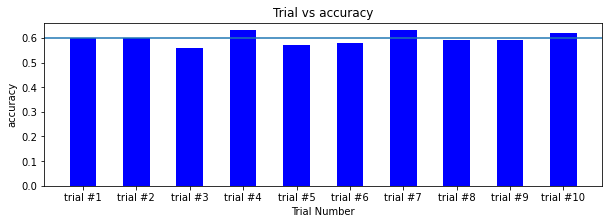

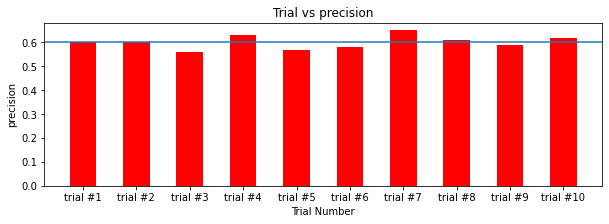

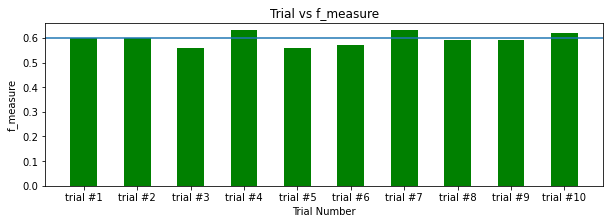

In [181]:
#Plot the metrics
columns = entropy_cross_validation.columns.values[1:-1]
accuracy_values = entropy_cross_validation.loc[0].values[1:-1]
precision_values = entropy_cross_validation.loc[1].values[1:-1]
f_measure_values = entropy_cross_validation.loc[2].values[1:-1]

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, accuracy_values, color = 'blue', width = 0.5)
plt.title("Trial vs accuracy") 
plt.xlabel("Trial Number") 
plt.ylabel("accuracy") 
plt.axhline(entropy_cross_validation['average'][0]) #show average line
print(gini_holdout['average'][0])
plt.show() 

#Create precision bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, precision_values, color = 'red', width = 0.5)
plt.title("Trial vs precision") 
plt.xlabel("Trial Number") 
plt.ylabel("precision") 
plt.axhline(entropy_cross_validation['average'][1]) #show average line
plt.show() 

#Create f-measure bar plot
plt.figure(figsize=(10,3))
plt.bar(columns, f_measure_values, color = 'green', width = 0.5)
plt.title("Trial vs f_measure") 
plt.xlabel("Trial Number") 
plt.ylabel("f_measure") 
plt.axhline(entropy_cross_validation['average'][2]) #show average line
plt.show() 

### Observations:
The plots above show that the accuracy is just above average (60%), the precision is just above average (60%), and the f_measure is just above average (60%).

In [185]:
#Select accuracies
gini_cross_validation_accuracy = gini_cross_validation['average'][0]
entropy_cross_validation_accuracy  = entropy_cross_validation['average'][0]
#print(gini_cross_validation_accuracy)
#print(entropy_cross_validation_accuracy)

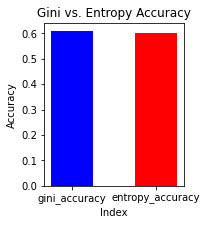

In [186]:
accuracy_labels = ["gini_accuracy", "entropy_accuracy"]
accuracy_values = [gini_cross_validation_accuracy, entropy_cross_validation_accuracy]

#Create the bar plot
plt.figure(figsize=(2.5,3))
plt.bar(accuracy_labels, accuracy_values, color =['blue', 'red'], width = 0.5)
plt.title("Gini vs. Entropy Accuracy") 
plt.xlabel("Index") 
plt.ylabel("Accuracy") 
plt.show() 

### Observations:
The plot above shows that the final accuracy using gini is slightly higher at 61% than entropy at 70%.

## Part 3 - Tree Depth Investigation

In [187]:
tree_depths = np.arange(2, 51, 3)
train_y = []
test_y = []
for tree_depth in range (2, 51, 3):
    gini_holdout_accuracy_train = holdout_x5_v2(sub_data, 'gini', tree_depth, False)['average'][0]
    gini_holdout_accuracy_test = holdout_x5_v2(sub_data, 'gini', tree_depth, True)['average'][0]
    train_y.append(gini_holdout_accuracy_train)
    test_y.append(gini_holdout_accuracy_test)
print(train_y)
print(test_y)

[0.72, 0.75, 0.82, 0.89, 0.95, 0.98, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.69, 0.71, 0.65, 0.66, 0.64, 0.69, 0.61, 0.61, 0.61, 0.58, 0.62, 0.6, 0.66, 0.66, 0.66, 0.62, 0.62]


Text(0, 0.5, 'Accuracy')

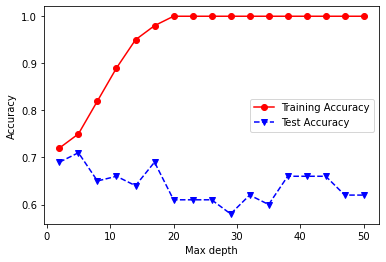

In [188]:
#Plot the tree-depth accuracies
plt.plot(tree_depths, train_y, 'ro-', tree_depths, test_y, 'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Observations:
The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). The training accuracy reaches at 100% at around a maximum depth of 20. However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model becoming too complex and overfitting.